Задание 1: Для реализованной в методичке модели градиентного бустинга построить графики зависимости ошибки от количества деревьев в ансамбле и от максимальной глубины деревьев. Сделать выводы о зависимости ошибки от этих параметров.

In [2]:
from sklearn.tree import DecisionTreeRegressor

from sklearn import model_selection
import numpy as np

In [3]:
from sklearn.datasets import load_diabetes

In [4]:
X, y = load_diabetes(return_X_y=True)

In [5]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.25)

In [6]:
def gb_predict(X, trees_list, coef_list, eta):
    return np.array([sum([eta* coef * alg.predict([x])[0] for alg, coef in zip(trees_list, coef_list)]) for x in X])

In [7]:
def mean_squared_error(y_real, prediction):
    return (sum((y_real - prediction)**2)) / len(y_real)

In [8]:
def bias(y, z):
    return (y - z)

In [9]:
def gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta):
    
    trees = []
    
    train_errors = []
    test_errors = []
    
    for i in range(n_trees):
        tree = DecisionTreeRegressor(max_depth=max_depth, random_state=42)

        if len(trees) == 0:
            tree.fit(X_train, y_train)
            
            train_errors.append(mean_squared_error(y_train, gb_predict(X_train, trees, coefs, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, coefs, eta)))
        else:
            target = gb_predict(X_train, trees, coefs, eta)
            
            tree.fit(X_train, bias(y_train, target))
            
            train_errors.append(mean_squared_error(y_train, gb_predict(X_train, trees, coefs, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, coefs, eta)))

        trees.append(tree)
        
    return trees, train_errors, test_errors

In [10]:
def evaluate_alg(X_train, X_test, y_train, y_test, trees, coefs, eta):
    train_prediction = gb_predict(X_train, trees, coefs, eta)

    print(f'Ошибка алгоритма из {n_trees} деревьев глубиной {max_depth} \
    с шагом {eta} на тренировочной выборке: {mean_squared_error(y_train, train_prediction)}')

    test_prediction = gb_predict(X_test, trees, coefs, eta)

    print(f'Ошибка алгоритма из {n_trees} деревьев глубиной {max_depth} \
    с шагом {eta} на тестовой выборке: {mean_squared_error(y_test, test_prediction)}')

In [14]:
def evaluate_alg_mod(X_train, X_test, y_train, y_test, trees, coefs, eta):
    train_prediction = gb_predict(X_train, trees, coefs, eta)
    test_prediction = gb_predict(X_test, trees, coefs, eta)    
    return mean_squared_error(y_train, train_prediction), mean_squared_error(y_test, test_prediction)

In [23]:
n_trees = 70
coefs = [1] * n_trees
max_depth = 3
eta = 0.1

In [24]:
mean_squared_error_train =[]
mean_squared_error_test =[]
for i in range(1,n_trees,10):
    trees, train_errors, test_errors = gb_fit(i, max_depth, X_train, X_test, y_train, y_test, coefs, eta)
    mse_train, mse_test = evaluate_alg_mod(X_train, X_test, y_train, y_test, trees, coefs, eta)
    mean_squared_error_train.append(mse_train)
    mean_squared_error_test.append(mse_test)

In [25]:
import matplotlib.pyplot as plt

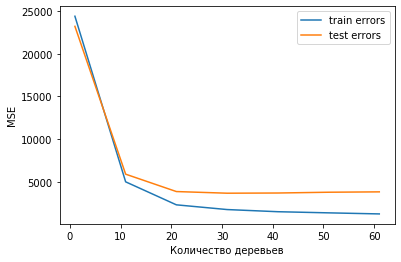

In [27]:
x = list(range(1, n_trees+1,10))

plt.plot(x, mean_squared_error_train, label='train errors')
plt.plot(x, mean_squared_error_test, label='test errors')
plt.xlabel('Количество деревьев')
plt.ylabel('MSE')
plt.legend(loc='best')
plt.show()

Как видно из графика качество на тестовой выборке перестает расти при увеличении кол-ва деревьев больше промежутка 20-30 деревьев. Примем 25 деревьев оптимальным количеством. 

In [29]:
n_trees = 25
coefs = [1] * n_trees
max_depth = [1,2,3,4,5,6,7,8,10,12,14,16,20]
eta = 0.1

In [30]:
mean_squared_error_train =[]
mean_squared_error_test =[]
for i in max_depth:
    trees, train_errors, test_errors = gb_fit(n_trees, i, X_train, X_test, y_train, y_test, coefs, eta)
    mse_train, mse_test = evaluate_alg_mod(X_train, X_test, y_train, y_test, trees, coefs, eta)
    mean_squared_error_train.append(mse_train)
    mean_squared_error_test.append(mse_test)

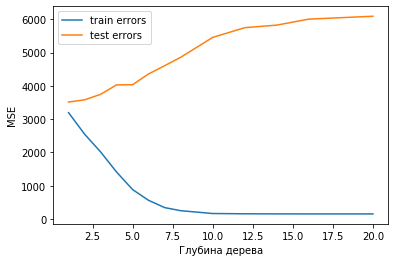

In [33]:
plt.plot(max_depth, mean_squared_error_train, label='train errors')
plt.plot(max_depth, mean_squared_error_test, label='test errors')
plt.xlabel('Глубина дерева')
plt.ylabel('MSE')
plt.legend(loc='best')
plt.show()

Оптимальная глубина дерева - 1.